# Examples

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import keras

from pipeline import pipeline, utils
from pipeline import train_and_test
from models.patch_identifier import PatchIdentifier

Using TensorFlow backend.


## Train the MSM on the UC Merced aerial data

In [2]:
def _train_on_uc_merced():
    """
    """

    # Load in data
    data_path = "/Users/bdhammel/Documents/insight/data/UCMerced_LandUse/"

    dataset = import_uc_merced.DataSet(data_path)
    Xtrain, Ytrain = dataset.get_train_data()
    Xtest, Ytest = dataset.get_test_data()

    one_hot_ytrain = keras.utils.to_categorical(Ytrain-1, 5)
    one_hot_ytest = keras.utils.to_categorical(Ytest-1, 5)

    model = PatchIdentifier()

    auger = ImageDataGenerator(
                rotation_range=90,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                channel_shift_range=0.2
    )

    model.attach_augmentor(auger)

    # Only train the top of the model, used the features from Resnet
    model.train(Xtrain, one_hot_ytrain, epochs=20, fix_layers=(0, 196))

    print("Finished Training")

    print("Accuracy: {:.2f}%".format(100*model.evaluate(Xtest, one_hot_ytest)[1]))

    # Save all of your hard work 
    model.save("./saved_models/patch_identifier.h5")


In [3]:
#train_msm_on_uc_merced()

Uncommenting the above line will give you something of the sorts:
```
Epoch 1/5
335/335 [==============================] - 55s 165ms/step - loss: 1.1985 - acc: 0.5403
Epoch 2/5
335/335 [==============================] - 65s 193ms/step - loss: 0.6123 - acc: 0.8060
Epoch 3/5
335/335 [==============================] - 67s 201ms/step - loss: 0.4839 - acc: 0.8358
Epoch 4/5
335/335 [==============================] - 65s 193ms/step - loss: 0.2485 - acc: 0.9254
Epoch 5/5
335/335 [==============================] - 63s 188ms/step - loss: 0.3570 - acc: 0.8985
Finished Training
165/165 [==============================] - 35s 210ms/step
Accuracy: 80.00%
```

(-0.5, 399.5, 399.5, -0.5)

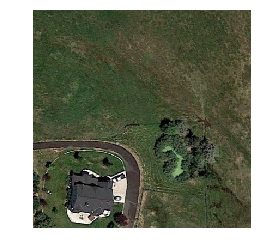

In [4]:
img = pipeline.load_from_file("./datasets/raw_images/test.jpg")
plt.imshow(img.data)
plt.axis('off')

In [5]:
model = PatchIdentifier("./models/saved_models/patch_identifier.h5")

In [6]:
batch = img.as_batch()
predictions = model.predict(batch)

Can only preserve up to pix:  [400 400   3]


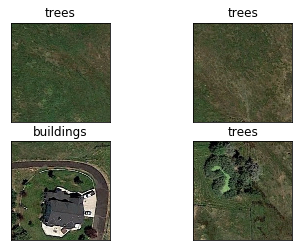

In [7]:
f, axes = plt.subplots(2,2)
labels = utils.ids_to_classes(predictions)
axes[0,0].imshow(batch[0])
axes[0,0].set_title(labels[0])
axes[0,1].imshow(batch[1])
axes[0,1].set_title(labels[1])
axes[1,0].imshow(batch[2])
axes[1,0].set_title(labels[2])
axes[1,1].imshow(batch[3])
axes[1,1].set_title(labels[3])

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])